In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics as m
import itertools
from sklearn.metrics import plot_confusion_matrix
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from sklearn.model_selection import GridSearchCV

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

df_fake["class"] = 0
df_true["class"] = 1

In [3]:
print(len(df_fake))
df_fake.drop(df_fake.tail(13400).index, inplace = True)
df_fake

23481


,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
10076,ALT-LEFT PLANS TO HIJACK PRESIDENT TRUMP’S AZ ...,The pieces are in place ahead of President Don...,politics,"Aug 22, 2017",0
10077,WATCH: LOUIE GOHMERT Wants LYING Democrat VA G...,Why did the Democrat VA Governor throw gasolin...,politics,"Aug 22, 2017",0
10078,PATRIOT ARTIST’S LATEST TRIBUTE TO TRUMP SUPPO...,Patriot artist John McNaughton just revealed h...,politics,"Aug 21, 2017",0
10079,CHELSEA CLINTON Uses “Lucifer” To Support Argu...,Chelsea Clinton thought she was quite clever w...,politics,"Aug 21, 2017",0


In [4]:
print(len(df_true))
df_true.drop(df_true.tail(11400).index, inplace = True)
df_true

21417


,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
10012,New Jersey's Christie loses bid to freeze Atla...,ATLANTIC CITY (Reuters) - A New Jersey judge o...,politicsNews,"April 8, 2016",1
10013,Leak of Senate encryption bill prompts swift b...,WASHINGTON (Reuters) - Security researchers an...,politicsNews,"April 8, 2016",1
10014,Papal official denies report Sanders invited h...,VATICAN CITY/WASHINGTON (Reuters) - U.S. Democ...,politicsNews,"April 8, 2016",1
10015,Bill Clinton confronts protesters who say his ...,NEW YORK (Reuters) - Former President Bill Cli...,politicsNews,"April 7, 2016",1


In [5]:
df_fake.shape, df_true.shape

((10081, 5), (10017, 5))

In [6]:
df = pd.concat([df_fake, df_true], axis =0 )
df

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
10012,New Jersey's Christie loses bid to freeze Atla...,ATLANTIC CITY (Reuters) - A New Jersey judge o...,politicsNews,"April 8, 2016",1
10013,Leak of Senate encryption bill prompts swift b...,WASHINGTON (Reuters) - Security researchers an...,politicsNews,"April 8, 2016",1
10014,Papal official denies report Sanders invited h...,VATICAN CITY/WASHINGTON (Reuters) - U.S. Democ...,politicsNews,"April 8, 2016",1
10015,Bill Clinton confronts protesters who say his ...,NEW YORK (Reuters) - Former President Bill Cli...,politicsNews,"April 7, 2016",1


In [7]:
df = df.drop(["title", "subject","date"], axis = 1)
df

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
10012,ATLANTIC CITY (Reuters) - A New Jersey judge o...,1
10013,WASHINGTON (Reuters) - Security researchers an...,1
10014,VATICAN CITY/WASHINGTON (Reuters) - U.S. Democ...,1
10015,NEW YORK (Reuters) - Former President Bill Cli...,1


In [8]:
df = df.sample(frac = 1)
df

,text,class
6335,In response to the Department of Justice s gui...,0
2997,WASHINGTON (Reuters) - Two Democratic congress...,1
7891,While meeting with the press in the Oval Offic...,0
1868,With Devin Nunes recusal from the House Intel...,0
9552,NEW YORK (Reuters) - Supporters of billionaire...,1
...,...,...
3725,"On Face The Nation, Mike Pence showed exactly ...",0
870,As if the Republican Party couldn t possibly l...,0
6837,(Reuters) - Below are people mentioned as cont...,1
942,Donald Trump s attacks on the free press conti...,0


In [9]:
df.drop_duplicates(inplace = True)

#New shape of the df
df.shape

# Check for Missing data (NAN,na,NaN) for each column
df.isnull().sum()

text     0
class    0
dtype: int64

In [10]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

df

,text,class
0,In response to the Department of Justice s gui...,0
1,WASHINGTON (Reuters) - Two Democratic congress...,1
2,While meeting with the press in the Oval Offic...,0
3,With Devin Nunes recusal from the House Intel...,0
4,NEW YORK (Reuters) - Supporters of billionaire...,1
...,...,...
20039,"On Face The Nation, Mike Pence showed exactly ...",0
20040,As if the Republican Party couldn t possibly l...,0
20041,(Reuters) - Below are people mentioned as cont...,1
20042,Donald Trump s attacks on the free press conti...,0


In [11]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [12]:
df["text"] = df["text"].apply(wordopt)

In [13]:
ps = PorterStemmer()
def stemming_and_stopwords(text):
    
    # Remove stopwords and tokenization
    clean_words = [word for word in text.split() if word not in stopwords.words('english')]
    
    # Stemming
    for i in range(len(clean_words)):
        clean_words[i] = ps.stem(clean_words[i])

    return clean_words

In [14]:
x = df["text"]
y = df["class"]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [16]:
print(x_train.shape)
print(y_train.shape)

(15033,)
(15033,)


In [17]:
print(x_test.shape)
print(y_test.shape)

(5011,)
(5011,)


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer(analyzer=stemming_and_stopwords)
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [19]:
print(type(xv_test))
print(xv_test.shape)
xv_test[0]

<class 'scipy.sparse.csr.csr_matrix'>
(5011, 44995)


<1x44995 sparse matrix of type '<class 'numpy.float64'>'
	with 163 stored elements in Compressed Sparse Row format>

In [20]:
def confusion_mat(Y_test, pred):
    TN = 0
    TP=0
    FN=0
    FP=0
    

    for i in range(len(Y_test)):
        
        if pred[i] == 0 and Y_test[i] == 0:
            TN=TN+1
        elif pred[i] == 1 and Y_test[i] == 1:
            TP=TP+1
        elif pred[i] == 1 and Y_test[i] == 0:
            FP=FP+1
        else:
            FN=FN+1
    
    return TN,TP,FN,FP

def accuracy_score(TN,TP,FN,FP):
    total = TN+TP+FN+FP
    return (TN+TP)/total


def precision_score(TN,TP,FN,FP):
    return TP/(TP+FP)


def recall_score(TN,TP,FN,FP):
    return TP/(TP+FN)


def f1_score(TN,TP,FN,FP):
    p = TP/(TP+FP)
    r = TP/(TP+FN)
    return  2*p*r/(p+r)

## KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
accuracy_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xv_train, y_train) 
    accuracy_rate.append(m.accuracy_score(y_test, knn.predict(xv_test)))

Text(0, 0.5, 'Acuuracy Rate')

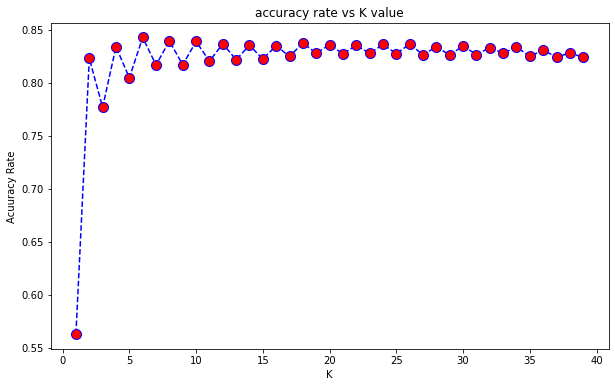

In [23]:
 plt.figure(figsize=(10,6))
 plt.plot(range(1,40), accuracy_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize =10)
 plt.title('accuracy rate vs K value')
 plt.xlabel('K')
 plt.ylabel('Acuuracy Rate')

## Hyperparameter tuning

In [26]:
# p=[1,2]
# leaf_size = list(range(1,30))
# n_neighbors = list(range(1,15))
# hyperparameters = dict(leaf_size=leaf_size,n_neighbors=n_neighbors, p=p)


# knn_2 = KNeighborsClassifier()

# clf = GridSearchCV(knn_2, hyperparameters)

# best_model = clf.fit(xv_train, y_train)

# print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
# print('Best p:', best_model.best_estimator_.get_params()['p'])  
# print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

# pred_knn2 = best_model.predict(xv_test)

# #CONFUSION MATRIX
# TN,TP,FN,FP = confusion_mat(y_test.to_numpy(), pred_knn2)

# print("True Negative ", TN)
# print("False Positive ", FP)
# print("False Negative ", FN)
# print("True Positive ", TP)

# print("ACCURACY   : ",accuracy_score(TN,TP,FN,FP))
# print("PRECISION  : ",precision_score(TN,TP,FN,FP))
# print("RECALL     : ",recall_score(TN,TP,FN,FP))
# print("F1_SCORE : ",f1_score(TN,TP,FN,FP))

In [25]:
acc =0
best_p=0
best_n=0
best_leaf=0
ct = 0
for p in range(1,3):
    for n in range(1, 16):
        for leaf in range(1,31):
            knn = KNeighborsClassifier(n_neighbors=n, leaf_size=leaf, p=p)
            knn.fit(xv_train, y_train) 
            curr = m.accuracy_score(y_test, knn.predict(xv_test))
            ct+=1
            print(ct, end = " ")
            if curr > acc :
                acc = curr
                best_leaf = leaf
                best_p = p
                best_n = n



1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

In [26]:
print('Best leaf_size:', best_leaf)
print('Best p:', best_p)  
print('Best n_neighbors:', best_n)

Best leaf_size: 1
Best p: 2
Best n_neighbors: 6


## KNN classification after all values

In [27]:
knn = KNeighborsClassifier(n_neighbors=best_n, leaf_size=best_leaf, p = best_p)
knn.fit(xv_train, y_train)

pred_knn = knn.predict(xv_test)

accuracy = m.accuracy_score(y_test, pred_knn)

#CONFUSION MATRIX
TN,TP,FN,FP = confusion_mat(y_test.to_numpy(), pred_knn)

print("True Negative ", TN)
print("False Positive ", FP)
print("False Negative ", FN)
print("True Positive ", TP)

print("ACCURACY   : ",accuracy_score(TN,TP,FN,FP))
print("PRECISION  : ",precision_score(TN,TP,FN,FP))
print("RECALL     : ",recall_score(TN,TP,FN,FP))
print("F1_SCORE : ",f1_score(TN,TP,FN,FP))

True Negative  1906
False Positive  631
False Negative  157
True Positive  2317
ACCURACY   :  0.842745958890441
PRECISION  :  0.7859565807327001
RECALL     :  0.9365400161681487
F1_SCORE :  0.8546661748432313
